In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression

In [142]:
df1 = pd.read_csv('./Weather dataset/final_merged.csv')
df1 = df1.drop(['Unnamed: 0'] , axis=1)

In [143]:
df1.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'time', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity',
       'date', 'airport'],
      dtype='object')

In [144]:
df1.shape

(1877296, 32)

In [145]:
df1=df1.dropna()

In [146]:
df1.shape

(1851436, 32)

In [147]:
df1 = df1.drop(['FlightDate','Origin','Dest','time','date','airport','ArrTime','ArrDel15','ArrDelayMinutes',
       'DepTime'],axis=1)

In [148]:
df1.isnull().sum()

Year               0
Quarter            0
Month              0
DayofMonth         0
OriginAirportID    0
DestAirportID      0
CRSDepTime         0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
windspeedKmph      0
DewPointF          0
cloudcover         0
precipMM           0
pressure           0
WindGustKmph       0
visibility         0
weatherCode        0
tempF              0
WindChillF         0
winddirDegree      0
humidity           0
dtype: int64

In [149]:
cor= df1.corr() 
cor

,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDelayMinutes,DepDel15,CRSArrTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
Year,1.000000,-0.001637,-0.002259,0.000282,0.000417,0.000467,0.001652,0.003559,0.005343,0.000132,...,-0.090776,0.009011,-0.044014,0.040500,0.058149,-0.022875,-0.010559,0.004334,0.000652,-0.044481
Quarter,-0.001637,1.000000,0.970563,0.010774,0.003222,0.003261,-0.002041,-0.015958,-0.020260,-0.004034,...,-0.086989,-0.038045,0.037480,-0.093063,0.119824,-0.088188,0.153255,0.149327,-0.046110,-0.055307
Month,-0.002259,0.970563,1.000000,0.010626,0.003303,0.003313,-0.001571,-0.017639,-0.021118,-0.004775,...,-0.084364,-0.040742,0.042694,-0.090313,0.120989,-0.088740,0.142800,0.138441,-0.047460,-0.054493
DayofMonth,0.000282,0.010774,0.010626,1.000000,0.000392,0.000320,0.000285,-0.006648,-0.007052,-0.001930,...,-0.015740,-0.002263,-0.033245,0.006162,0.025409,-0.009805,0.016599,0.016145,0.001128,-0.001509
OriginAirportID,0.000417,0.003222,0.003303,0.000392,1.000000,-0.026566,-0.045762,0.006846,0.012226,-0.025247,...,0.074219,-0.029379,-0.057899,-0.047123,-0.020389,-0.026796,-0.050504,-0.046602,0.010839,0.099604
DestAirportID,0.000467,0.003261,0.003313,0.000320,-0.026566,1.000000,0.062883,0.016703,0.031402,0.010083,...,-0.013905,-0.010247,-0.028681,0.001860,0.014033,-0.018037,-0.029387,-0.028154,0.029198,-0.024454
CRSDepTime,0.001652,-0.002041,-0.001571,0.000285,-0.045762,0.062883,1.000000,0.104758,0.154992,0.487311,...,-0.059504,0.033394,-0.077750,0.116873,0.110844,0.012179,0.154128,0.154103,0.054804,-0.199771
DepDelayMinutes,0.003559,-0.015958,-0.017639,-0.006648,0.006846,0.016703,0.104758,1.000000,0.608084,0.086946,...,0.031201,0.081763,-0.052153,0.070939,-0.018663,0.079147,0.030272,0.027964,0.012528,0.003518
DepDel15,0.005343,-0.020260,-0.021118,-0.007052,0.012226,0.031402,0.154992,0.608084,1.000000,0.118576,...,0.029287,0.080590,-0.060166,0.072145,-0.012012,0.080379,0.036996,0.033870,0.022263,-0.006679
CRSArrTime,0.000132,-0.004034,-0.004775,-0.001930,-0.025247,0.010083,0.487311,0.086946,0.118576,1.000000,...,-0.033264,0.030831,-0.060223,0.090936,0.093813,0.014077,0.146131,0.135804,0.018510,-0.210311


<AxesSubplot: >

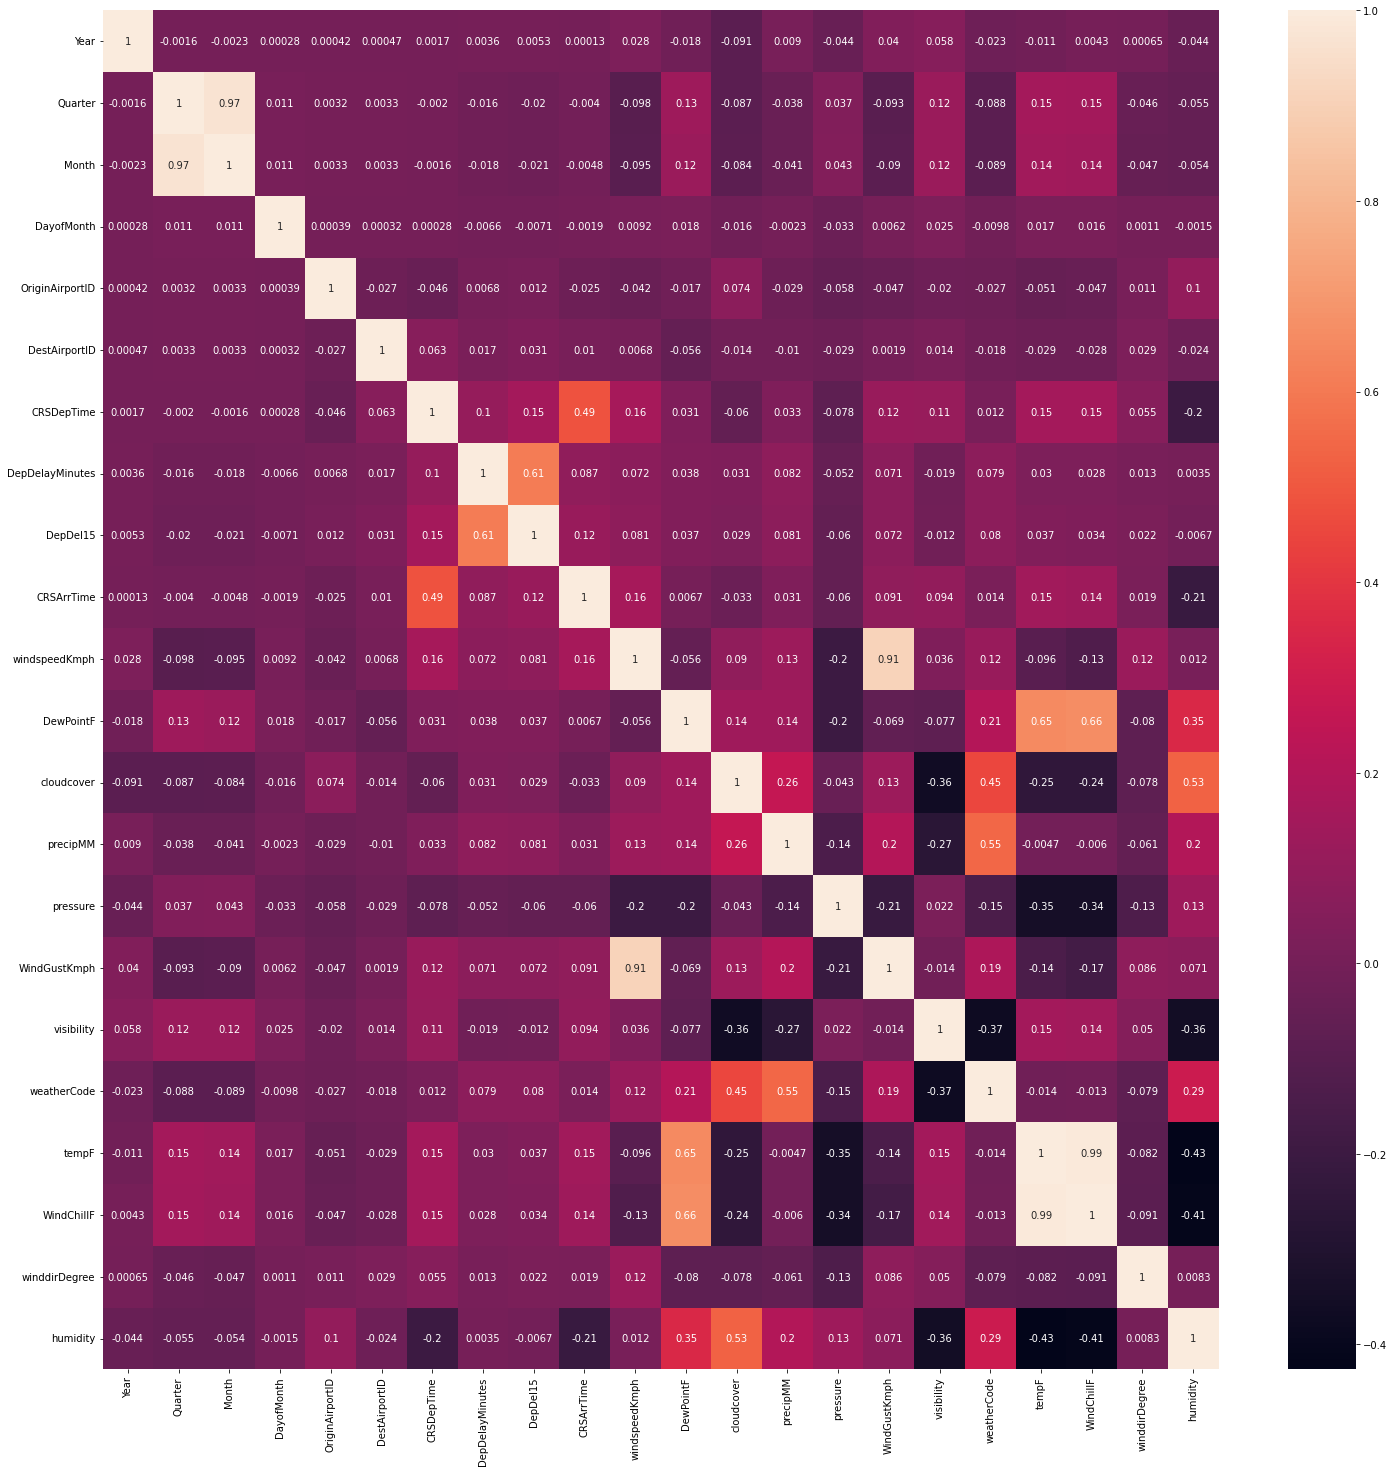

In [150]:
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True)

In [151]:
#month and quarter are positivly correlated
#windspeedkmph and windGustKmph are positivly correlated
#WindChillF and tempF are positivly correlated
df1 = df1.drop(['Quarter','WindGustKmph','WindChillF','DepDelayMinutes'],axis=1)

In [152]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepDel15,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,0.0,1642,12,67,39,0.0,1017,10,116,76,117,74
1,2017,9,25,12478,13930,902,0.0,1045,6,66,55,0.0,1018,10,116,70,145,90
2,2017,9,25,13930,12478,2044,0.0,2359,10,63,5,0.0,1013,10,113,85,151,48
3,2017,9,25,11057,12478,1952,0.0,2157,11,64,32,0.0,1013,10,116,80,41,59
4,2017,9,25,12478,11057,1658,0.0,1914,14,66,47,0.0,1017,10,143,72,134,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,0.0,1330,16,56,100,1.9,1017,6,302,61,331,87
1877292,2016,1,3,14107,11292,2110,1.0,2259,17,38,99,0.0,1013,10,122,62,76,42
1877293,2016,1,3,11292,14107,1830,1.0,2024,4,26,100,0.0,1029,0,260,26,158,100
1877294,2016,1,3,13930,13204,925,1.0,1312,19,21,100,0.0,1022,10,122,24,333,89


In [153]:
X = df1.drop('DepDel15',axis=1)
y = df1['DepDel15']

In [154]:
X

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,visibility,weatherCode,tempF,winddirDegree,humidity
0,2017,9,25,12478,13204,1346,1642,12,67,39,0.0,1017,10,116,76,117,74
1,2017,9,25,12478,13930,902,1045,6,66,55,0.0,1018,10,116,70,145,90
2,2017,9,25,13930,12478,2044,2359,10,63,5,0.0,1013,10,113,85,151,48
3,2017,9,25,11057,12478,1952,2157,11,64,32,0.0,1013,10,116,80,41,59
4,2017,9,25,12478,11057,1658,1914,14,66,47,0.0,1017,10,143,72,134,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,1,3,13204,13930,1130,1330,16,56,100,1.9,1017,6,302,61,331,87
1877292,2016,1,3,14107,11292,2110,2259,17,38,99,0.0,1013,10,122,62,76,42
1877293,2016,1,3,11292,14107,1830,2024,4,26,100,0.0,1029,0,260,26,158,100
1877294,2016,1,3,13930,13204,925,1312,19,21,100,0.0,1022,10,122,24,333,89


# FIXING CLASS IMBALANCE

In [155]:
y.value_counts()

0.0    1479357
1.0     372079
Name: DepDel15, dtype: int64

# oversampling using SMOTE

In [156]:
sm = SMOTE(random_state=10)
X , y = sm.fit_resample(X , y)

In [157]:
#after smote
y.value_counts()

0.0    1479357
1.0    1479357
Name: DepDel15, dtype: int64

In [158]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# Logistic Regression with smote

In [19]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [20]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.6028951757773222

In [21]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60    295872
         1.0       0.60      0.61      0.61    295871

    accuracy                           0.60    591743
   macro avg       0.60      0.60      0.60    591743
weighted avg       0.60      0.60      0.60    591743



# DecisionTreeClassifier with smote

In [22]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.7982215252229431

In [24]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80    295872
         1.0       0.80      0.80      0.80    295871

    accuracy                           0.80    591743
   macro avg       0.80      0.80      0.80    591743
weighted avg       0.80      0.80      0.80    591743



# RandomForestClassifier with smote

In [86]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
res = model_RFC.predict(X_test)
model_RFC.score(X_test,y_test)

0.8593173049786816

In [88]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86    295871
         1.0       0.88      0.83      0.85    295872

    accuracy                           0.86    591743
   macro avg       0.86      0.86      0.86    591743
weighted avg       0.86      0.86      0.86    591743



# XGBOOST with smote

In [28]:
model_XG = XGBClassifier()
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79    295872
         1.0       0.81      0.71      0.76    295871

    accuracy                           0.77    591743
   macro avg       0.78      0.77      0.77    591743
weighted avg       0.78      0.77      0.77    591743



In [30]:
model_XG.score(X_test,y_test)

0.7731346209418616

# ExtraTreesClassifier with somte

In [31]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [32]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86    295872
         1.0       0.87      0.84      0.86    295871

    accuracy                           0.86    591743
   macro avg       0.86      0.86      0.86    591743
weighted avg       0.86      0.86      0.86    591743



In [33]:
model_ETC.score(X_test,y_test)

0.857891010117568

# UNDERSAMPLING

In [16]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X , y = undersample.fit_resample(X, y)

In [18]:
y.value_counts()

0.0    372079
1.0    372079
Name: DepDel15, dtype: int64

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# RandomForestClassifier with undersampling

In [20]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
res = model_RFC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     74416
         1.0       0.65      0.62      0.63     74416

    accuracy                           0.64    148832
   macro avg       0.64      0.64      0.64    148832
weighted avg       0.64      0.64      0.64    148832



In [22]:
model_RFC.score(X_test,y_test)

0.64104493657278

# Logistic regression with undersampling

In [23]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=3000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [24]:
res = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.5956514728015481

In [25]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     74416
         1.0       0.59      0.61      0.60     74416

    accuracy                           0.60    148832
   macro avg       0.60      0.60      0.60    148832
weighted avg       0.60      0.60      0.60    148832



# DecisionTreeClassifier with undersampling

In [26]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
res = model_DTC.predict(X_test)
model_DTC.score(X_test,y_test)

0.5879112018920662

In [28]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     74416
         1.0       0.59      0.59      0.59     74416

    accuracy                           0.59    148832
   macro avg       0.59      0.59      0.59    148832
weighted avg       0.59      0.59      0.59    148832



# XGBOOST WITH undersampling

In [29]:
model_XG = XGBClassifier(n_estimators=150)
model_XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
res = model_XG.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     74416
         1.0       0.66      0.66      0.66     74416

    accuracy                           0.66    148832
   macro avg       0.66      0.66      0.66    148832
weighted avg       0.66      0.66      0.66    148832



In [31]:
model_XG.score(X_test,y_test)

0.6582791335196732

# ExtraTreesClassifier with undersampling

In [32]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [33]:
res = model_ETC.predict(X_test)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

         0.0       0.62      0.65      0.64     74416
         1.0       0.63      0.61      0.62     74416

    accuracy                           0.63    148832
   macro avg       0.63      0.63      0.63    148832
weighted avg       0.63      0.63      0.63    148832



In [34]:
model_ETC.score(X_test,y_test)

0.627627123199312

# Best model - RandomForest with SMOTE

In [159]:
df2 = pd.read_csv('./Weather dataset/final_merged.csv')
df2 = df2.drop(['Unnamed: 0'] , axis=1)

In [160]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [161]:
res = model_RFC.predict(X)
res

array([0., 0., 0., ..., 1., 1., 1.])

In [162]:
print(classification_report(y,res))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97   1479357
         1.0       0.98      0.97      0.97   1479357

    accuracy                           0.97   2958714
   macro avg       0.97      0.97      0.97   2958714
weighted avg       0.97      0.97      0.97   2958714



In [163]:
X['depDel'] = res

In [164]:
df3 = X[X['depDel']==1]

In [165]:
df2.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'time', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity',
       'date', 'airport'],
      dtype='object')

In [243]:
df4 = pd.merge(df3,df2[['DepDelayMinutes']], left_index=True, right_index=True)

In [244]:
df4=df4.dropna()

In [245]:
from sklearn.preprocessing import MinMaxScaler
scl  = MinMaxScaler()
temp = scl.fit_transform(df4)
temp

array([[1.        , 0.72727273, 0.8       , ..., 0.89690722, 0.        ,
        0.06828628],
       [1.        , 0.72727273, 0.8       , ..., 0.6185567 , 0.        ,
        0.01313198],
       [1.        , 0.72727273, 0.8       , ..., 0.2371134 , 0.        ,
        0.01641497],
       ...,
       [0.        , 0.27272727, 0.06666667, ..., 0.72164948, 0.        ,
        0.03808273],
       [0.        , 0.54545455, 0.7       , ..., 0.16494845, 0.        ,
        0.04858831],
       [0.        , 0.81818182, 0.7       , ..., 0.43298969, 0.        ,
        0.        ]])

In [246]:
X = df4.drop(['DepDelayMinutes'],axis=1)
y = df4['DepDelayMinutes']

In [247]:
y.isnull().sum()

0

# Linear regression

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [249]:
model_LRG = LinearRegression()
model_LRG.fit(X_train,y_train)
res = model_LRG.predict(X_test)

In [250]:
model_LRG.score(X_test,y_test)

0.0003535471684654734

In [251]:
from sklearn.linear_model import Lasso
model_LSR = Lasso()
model_LSR.fit(X_train,y_train)

Lasso()

In [252]:
res = model_LSR.predict(X_test)
model_LSR.score(X_test,y_test)

0.00033783103658246993